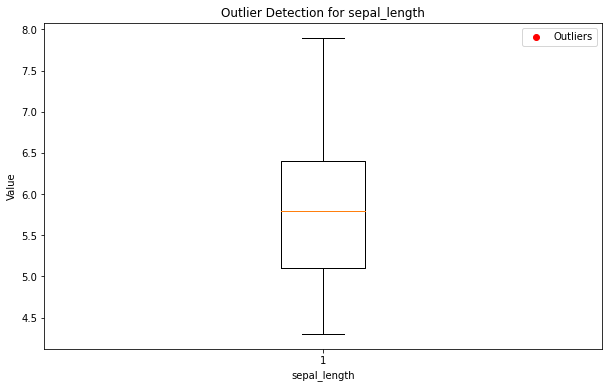

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

column = "sepal_length"

def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = detect_outliers(df[column])

plt.figure(figsize=(10, 6))
plt.boxplot(df[column])
plt.scatter(outliers.index, outliers, color="red", label="Outliers")
plt.xlabel(column)
plt.ylabel("Value")
plt.title("Outlier Detection for " + column)
plt.legend()
plt.show()


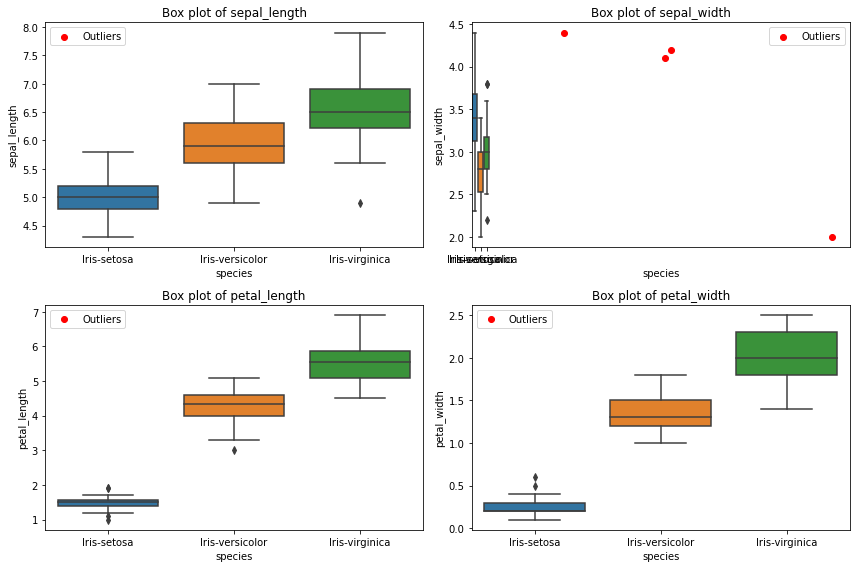

In [2]:
import seaborn as sns
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_df = pd.read_csv(url, names=column_names)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Plotting the box plots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(column_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="species", y=column, data=iris_df)
    plt.title(f"Box plot of {column}")

    outliers = detect_outliers_iqr(iris_df, column)
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.legend()

plt.tight_layout()
plt.show()

In [3]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [4]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [5]:
def plot_outliers(data, columns):
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(y=data[column])
        outliers = detect_outliers(data, column)
        plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f"Box plot of {column} with Outliers")
        plt.legend()
    plt.tight_layout()
    plt.show()


In [6]:
# Function to plot boxplot with outliers
def plot_outliers(data, columns):
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(y=data[column])
        outliers = detect_outliers(data, column)
        plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f"Box plot of {column} with Outliers")
        plt.legend()
    plt.tight_layout()
    plt.show()


In [7]:
def summarize_outliers(data, columns):
    summary = {}
    for column in columns:
        outliers = detect_outliers(data, column)
        summary[column] = outliers
    return summary


In [8]:
def plot_outliers_by_species(data, columns):
    plt.figure(figsize=(12, 12))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x="species", y=column, data=data)
        outliers = detect_outliers(data, column)
        plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
        plt.title(f"Box plot of {column} by Species with Outliers")
        plt.legend()
    plt.tight_layout()
    plt.show()


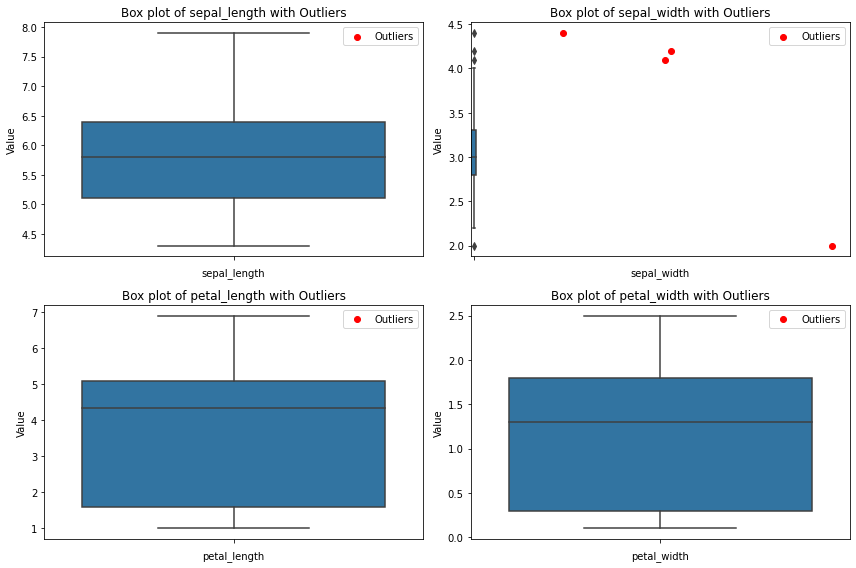

In [9]:
plot_outliers(df, column_names[:-1])


In [10]:
outliers_summary = summarize_outliers(df, column_names[:-1])

for column, outliers in outliers_summary.items():
    print(f"Outliers for {column}:")
    print(outliers)
    print("\n")


Outliers for sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Outliers for sepal_width:
    sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor


Outliers for petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Outliers for petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []




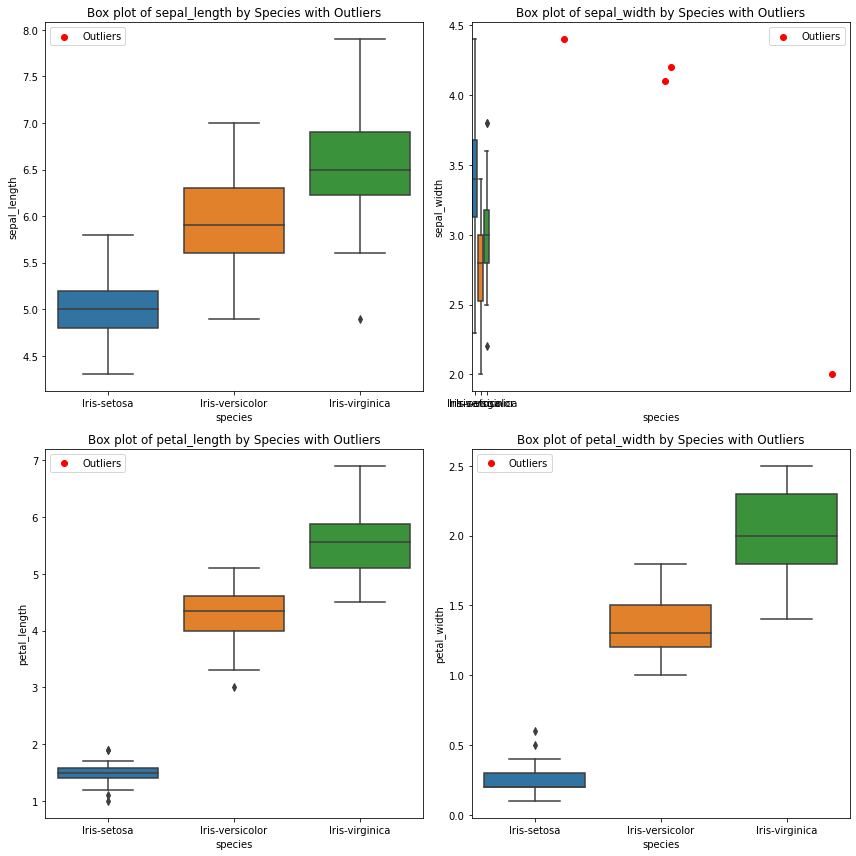

In [11]:
plot_outliers_by_species(df, column_names[:-1])


### Interpretation of Observations:

1. **Sepal Length**:
   - **No outliers**: There are no data points in the sepal length that fall outside the expected range (based on the IQR method).

2. **Sepal Width**:
   - **Outliers identified**:
     - Three instances of **Iris-setosa**:
       - **Index 15**: Sepal width of 4.4
       - **Index 32**: Sepal width of 4.1
       - **Index 33**: Sepal width of 4.2
     - One instance of **Iris-versicolor**:
       - **Index 60**: Sepal width of 2.0
   - **Interpretation**: These data points have sepal widths significantly different from the rest of the data. Specifically, the Iris-setosa instances have unusually high sepal widths, and the Iris-versicolor instance has an unusually low sepal width.

3. **Petal Length**:
   - **No outliers**: There are no data points in the petal length that fall outside the expected range.

4. **Petal Width**:
   - **No outliers**: There are no data points in the petal width that fall outside the expected range.

### Summary:
- **Outliers in Sepal Width**: The primary outliers detected are in the sepal width, with a few Iris-setosa having higher values and one Iris-versicolor having a lower value than the typical range.
- **No Outliers in Other Features**: Sepal length, petal length, and petal width do not have any significant outliers according to the IQR method.